# Using Convolutional Neural Networks

Use conda activate py27  
create a py27 environment  
since this older set of lessons all run on py 2.7 +  
The autoreload... is put in to reloead any ext files that have been modified while the contents in this book remained the same..

In [0]:
%matplotlib inline
%reload_ext autoreload
%autoreload 2

Define path to data:   
(TODO:Exlude the directory from git control by adding it to .gitignore.)

In [0]:
path = "data/dogscats/"

In [3]:
# path = "data/dogscats/"
#path = "C:/Users/IBM_ADMIN/FastAI/dogscats/dogscats/sample"
! mkdir data && wget http://files.fast.ai/data/dogscats.zip && unzip dogscats.zip -d data/

mkdir: cannot create directory ‘data’: File exists


A few basic libraries that are needed

In [0]:
from __future__ import division,print_function

import os, json
from glob import glob
import numpy as np
np.set_printoptions(precision=4, linewidth=100)
from matplotlib import pyplot as plt

File 'utils.py'   
stores any little convenience functions   
Reveiw the funcitons going forward..  
Code in the cell below is added to avoid adding the CWD into the system path manually :)

In [0]:
import os
import sys
nb_dir = os.path.split(os.getcwd())[0]
if nb_dir not in sys.path:
    sys.path.append(nb_dir)

### run 
#conda install -c conda-forge bcolz 
#conda install -c anaconda theano 
#in the conda prompt for installing bcolz and other necessary external packages/modules  
to install bcolz.. and then restart kernel for the changes to replect in the notebook  


In [6]:
! pip install fastai

In [7]:
! pip install theano

In [8]:
! pip install keras==1.2

In [9]:
! pip install tensorflow

In [10]:
from google.colab import files

uploaded = files.upload()

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))

Saving utils.py to utils (2).py
Saving vgg16.py to vgg16 (2).py
Saving vgg16bn.py to vgg16bn (2).py
User uploaded file "utils.py" with length 8227 bytes
User uploaded file "vgg16.py" with length 8618 bytes
User uploaded file "vgg16bn.py" with length 4680 bytes


In [11]:
os.environ['MKL_THREADING_LAYER'] = 'GNU'
# added above line in respone to an error that shows up in running the code below
#http://wiki.fast.ai/index.php/Local_install_(Windows_only:cpu)
import utils; 
#reload(utils) autoreloan in cell 1
import pickle
from utils import plots

Using TensorFlow backend.


# Use a pretrained VGG model with our **Vgg16** class

### The model in 7 lines of code



In [0]:
# As large as you can, but no larger than 64 is recommended. 
# If you have an older or cheaper GPU, you'll run out of memory, so will have to decrease this.
batch_size=64

In [0]:
# Import our class, and instantiate
import vgg16; 
#reload(vgg16)
from vgg16 import Vgg16

In [0]:
# the following downloads the weights.. takes time.. 10 mins on a fast inter net connection
# 500 -600 mb

In [15]:
vgg = Vgg16()
# Grab a few images at a time for training and validation.
# NB: They must be in subdirectories named based on their category
batches = vgg.get_batches(path+'train', batch_size=batch_size)
val_batches = vgg.get_batches(path+'valid', batch_size=batch_size*2)
vgg.finetune(batches)
vgg.fit(batches, val_batches, nb_epoch=1)

Instructions for updating:
keep_dims is deprecated, use keepdims instead
Found 23000 images belonging to 2 classes.
Found 2000 images belonging to 2 classes.
Instructions for updating:
keep_dims is deprecated, use keepdims instead
Instructions for updating:
keep_dims is deprecated, use keepdims instead
Epoch 1/1
 5632/23000 [======>.......................] - ETA: 308s - loss: 0.5470 - acc: 0.8347

23000/23000 [==============================] - 448s - loss: 0.4434 - acc: 0.8702 - val_loss: 0.1955 - val_acc: 0.9245


VGG 16 works any image recognition task, 
with any number of categories  
Put thy images into one folder per category, and run the code above.

and since the original challenge was sufficiently well diversified set of categories.. it is sufficiently generic

## Use Vgg16 for basic image recognition

We use the VGG16 model to classify the cats dogs pics into .. whatever categories the inmagenet model decides it belongs to..  

with each individual breed being a separate category. 

First, create a Vgg16 object instance:

In [0]:
vgg = Vgg16()

Vgg16 is built on top of *Keras* (which we will be learning much more about shortly!),
[and somehow pytorch is considered better...]
a flexible, easy to use deep learning library that sits on top of Theano or Tensorflow. 

Keras reads groups of images and labels in *batches*, using a fixed directory structure, where images from each category for training must be placed in a separate folder.

this grabs batches of data from our training folder:

In [17]:
batches = vgg.get_batches(path+'train', batch_size=4)

Found 23000 images belonging to 2 classes.


'classes' in Keras is categories.. or bins...

NOTE:: *Batches* is just a regular python iterator. remember the prime number generator.. iterator..  
Each iteration returns both the images themselves, as well as the labels.

In [0]:
imgs,labels = next(batches)

cat: [1,0]
dog: [0,1] 
aka *one hot encoding*. 

more categories implies a longer array with just one 1 in it..

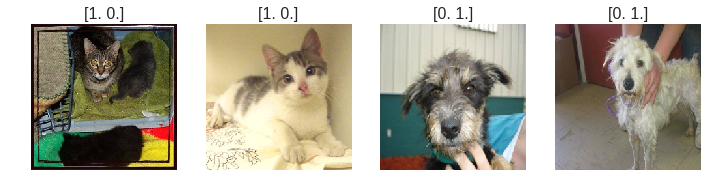

In [19]:
plots(imgs, titles=labels)

Pass the images to Vgg16's predict() function to get back   
probabilities,   
category indexes, and   
category names   

for each image's VGG prediction.   
We are still using the imagenet labels...

Look at the source code of the VGG get batches.. the funciton there  
returns a batchsize number of images..   
imgs then naturally holds.. only images  

LOL : arabian camel :D and 70% sure

In [20]:
vgg.predict(imgs, True)

(array([0.3753, 0.0956, 0.4484, 0.306 ], dtype=float32),
 array([260, 154, 196, 153]),
 ['chow', 'Pekinese', 'miniature_schnauzer', 'Maltese_dog'])

The category indexes are based on the ordering of categories used in the VGG model   
e.g here are the first four:  
174,283 etc were whatever those labels were matched to.. Norwegian_elkhound',  'Persian_cat'

In [21]:
vgg.classes[:4]

['tench', 'goldfish', 'great_white_shark', 'tiger_shark']

Note ::  
other than creating the Vgg16 object  
none of these steps are necessary to build a model  
this is sufficient.. if you want to cast your results into... imagenet predictions..

## Using Vgg16 class to finetune a Dogs vs Cats model

Goal::  

output "cat" vs "dog" instead of one of 1,000 very specific categories  
use a process called "finetuning".  

Finetuning looks from the outside to be identical to normal machine learning training   
we provide a training set with data and labels to learn from, and a validation set to test against  
The model learns a set of parameters based on the data provided.

the catch with this example::  we use a model that is already trained to solve a similar problem.  
since parameters are be very similar, or the same, between the existing model, and the model we wish to create.  
Therefore, we only select a subset of parameters to train, and leave the rest untouched.   

This happens **automatically** when we call *fit()* after calling *finetune()*.

Fine tune.. pops the outermost layer..wich is similar to a stack.. of layers..  
See code

Create our batches just like before, and making the validation set available as well.  
A 'batch' (or *mini-batch* as it is commonly known) is simply a subset of the training data   
We use a subset at a time when training or predicting, in order to  
speed up training, and to   
avoid running out of memory.

In [0]:
batch_size=64

In [23]:
batches = vgg.get_batches(path+'train', batch_size=batch_size)
val_batches = vgg.get_batches(path+'valid', batch_size=batch_size)

Found 23000 images belonging to 2 classes.
Found 2000 images belonging to 2 classes.


There is a keras preprocessing api.. image.ImageDataGenerator().flow_from_directory that takes care of the fetching the images from the directory  


In [24]:
#type(batches)
type(val_batches)

keras.preprocessing.image.DirectoryIterator

Calling *finetune()* modifies the model such that it will be trained based on the data in the batches provided - in this case, to predict either 'dog' or 'cat'.

In [0]:
vgg.finetune(batches)

Finally, we *fit()* the parameters of the model using the training data,   
reporting the accuracy on the validation set after every epoch.  
(An *epoch* is one full pass through the training data.)  

much of the heavy lifting is done by the iterators that come with the keras library/apis

In [26]:
vgg.fit(batches, val_batches, nb_epoch=1)

Epoch 1/1
23000/23000 [==============================] - 401s - loss: 0.4450 - acc: 0.8686 - val_loss: 0.1957 - val_acc: 0.9225


That shows all of the steps involved in using the Vgg16 class to create an image recognition model using whatever labels you are interested in.  
For instance, this process could classify paintings by style, or leaves by type of disease, or satellite photos by type of crop, and so forth.  
The training actually happens at the..
Fietune
and fit... fit is where you have the batches.. which are images.. binned by classes.. in folders..

Next :... dig one level deeper to see inside the Vgg16 class.

# Creating a VGG model from scratch in Keras

Creating all the funcitonality as seen above...   
using Keras...  
Necessary if you want to create your own models, you'll need to understand these details.     
basically for a better understanding of what's going on behind the scenes of the VGG 16 model..

## Model setup

We need to import all the modules we'll be using from numpy, scipy, and keras:

Why.. because jeremy said to.. the alternative is to find out all those liraries  one by one.. 

In [0]:
from numpy.random import random, permutation
from scipy import misc, ndimage
from scipy.ndimage.interpolation import zoom

import keras
from keras import backend as K
from keras.utils.data_utils import get_file
from keras.models import Sequential, Model
from keras.layers.core import Flatten, Dense, Dropout, Lambda
from keras.layers import Input
from keras.layers.convolutional import Convolution2D, MaxPooling2D, ZeroPadding2D
from keras.optimizers import SGD, RMSprop
from keras.preprocessing import image

Let's import the mappings from VGG ids to imagenet category ids and descriptions, for display purposes later.
This could have been .. modified.. to make the model read the weights from a local drive.. but since colab is online.. and badwidth aint a problem..  
let it be..  

the code required.. knowing how the weights file is structured... its a json file for sure.. and a massive one..  :P

In [0]:
FILES_PATH = 'http://files.fast.ai/models/'; CLASS_FILE='imagenet_class_index.json'
# Keras' get_file() is a handy function that downloads files, and caches them for re-use later
fpath = get_file(CLASS_FILE, FILES_PATH+CLASS_FILE, cache_subdir='models')
with open(fpath) as f: class_dict = json.load(f)
# Convert dictionary with string indexes into an array
classes = [class_dict[str(i)][1] for i in range(len(class_dict))]

Here's a few examples of the categories we just imported:..  
We might not have needed it.. 
But remember.. these are the starting weights...   
the fine tune and fit work better with starting weight closer to these numbers than ..  
starting from scratch

In [29]:
classes[:5]

['tench', 'goldfish', 'great_white_shark', 'tiger_shark', 'hammerhead']

## Model creation

Creating the model involves creating the model architecture,  
and then loading the model weights into that architecture.   
We will start by defining the basic pieces of the VGG architecture.
Architecture: fancy word for.. what are the building blocks/classes that form this model/ vgg 16 class  

VGG has just one type of convolutional block, and one type of fully connected ('dense') block. Here's the convolutional block definition:

In [0]:
def ConvBlock(layers, model, filters):
    for i in range(layers): 
        model.add(ZeroPadding2D((1,1)))
        model.add(Convolution2D(filters, 3, 3, activation='relu'))
    model.add(MaxPooling2D((2,2), strides=(2,2)))

...and here's the fully-connected definition.

Dense layer.. is a fully connected NN
Convolutional.. 2d.. and there is a convolutional 3d too..  


In [0]:
def FCBlock(model):
    model.add(Dense(4096, activation='relu'))
    model.add(Dropout(0.5))

Interesting notes  
When the VGG model was trained in 2014,   
the creators subtracted the average of each of the three (R,G,B) channels first,  
so that the data for each channel had a mean of zero. Furthermore,   
their software that expected the channels to be in B,G,R order,   

whereas Python by default uses R,G,B. We need to preprocess our data to make these two changes,  
so that it is compatible with the VGG model:

In [0]:
# Mean of each channel as provided by VGG researchers
vgg_mean = np.array([123.68, 116.779, 103.939]).reshape((3,1,1))

def vgg_preprocess(x):
    x = x - vgg_mean     # subtract mean
    return x[:, ::-1]    # reverse axis bgr->rgb

Now we're ready to define the VGG model architecture   
the number of layers.. is pure guesswork..?  
Gotta confirm :P

In [0]:
def VGG_16():
    model = Sequential() # the start of the definition of whatever is called/ regarded as model in the later pages/cells
    model.add(Lambda(vgg_preprocess, input_shape=(3,224,224)))

    ConvBlock(2, model, 64)
    ConvBlock(2, model, 128)
    ConvBlock(3, model, 256)
    ConvBlock(3, model, 512)
    ConvBlock(3, model, 512)

    model.add(Flatten())
    FCBlock(model)
    FCBlock(model)
    model.add(Dense(1000, activation='softmax'))
    return model
#The Sequential model is a linear stack of layers
#https://keras.io/getting-started/sequential-model-guide/

We'll learn about what these different blocks do later in the course. For now, it's enough to know that:

- Convolution layers are for finding patterns in images
- Dense (fully connected) layers are for combining patterns across an image

Now that we've defined the architecture, we can create the model like any python object:

In [0]:
model = VGG_16()

As well as the architecture, we need the weights that the VGG creators trained. 
The weights are the part of the model that is learnt from the data,  
whereas the architecture is pre-defined based on the nature of the problem. 

Downloading pre-trained weights is much preferred to training the model ourselves,  
since otherwise we would have to download the entire Imagenet archive,   

THis ^ is the pain point..   
a much larger data set.. and a much larger run time.. possible memory issues.. out of memory erros [rare with small batches]


and train the model for many days!  

It's very helpful when researchers release their weights, as they did here.  

:D

In [0]:
fpath = get_file('vgg16.h5', FILES_PATH+'vgg16.h5', cache_subdir='models')
model.load_weights(fpath)

## Getting imagenet predictions

The setup of the imagenet model is now complete, so all we have to do is grab a batch of images and call *predict()* on them.

In [0]:
batch_size = 4

Keras provides functionality to create batches of data from directories containing images;   
all we have to do is to define the size to resize the images to,:: check the target size parameter in the funciton definition  

what type of labels to create,  
whether to randomly shuffle the images,   
and how many images to include in each batch.  

We use this little wrapper [fancy word for.. encapsul..? similar to JS wrapper ..?]   
to define some helpful defaults appropriate for imagenet data:

In [0]:
def get_batches(dirname, gen=image.ImageDataGenerator(), shuffle=True, 
                batch_size=batch_size, class_mode='categorical'):
    return gen.flow_from_directory(path+dirname, target_size=(224,224), 
                class_mode=class_mode, shuffle=shuffle, batch_size=batch_size)

From here we can use exactly the same steps as before to look at predictions from the model.

Found 23000 images belonging to 2 classes.
Found 2000 images belonging to 2 classes.


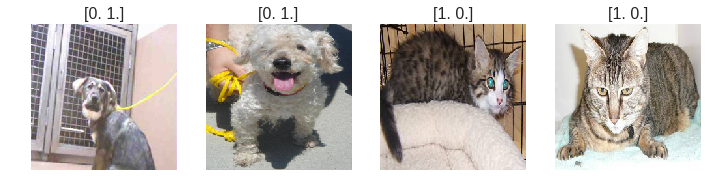

In [38]:
batches = get_batches('train', batch_size=batch_size)
val_batches = get_batches('valid', batch_size=batch_size)
imgs,labels = next(batches)

# This shows the 'ground truth'
plots(imgs, titles=labels)

The class mode.. takes care of the labeling.. is fed as categorical..


The VGG model returns 1,000 probabilities for each image,  
hangover from the imagenet..  
representing the probability that the model assigns to each possible imagenet category for each image.  

By finding the index with the largest probability (with *np.argmax()*) we can find the predicted label.

https://keras.io/preprocessing/image/

In [0]:
def pred_batch(imgs):
    preds = model.predict(imgs)
    idxs = np.argmax(preds, axis=1)

    print('Shape: {}'.format(preds.shape))
    print('First 5 classes: {}'.format(classes[:5]))
    print('First 5 probabilities: {}\n'.format(preds[0, :5]))
    print('Predictions prob/class: ')
    
    for i in range(len(idxs)):
        idx = idxs[i]
        print ('  {:.4f}/{}'.format(preds[i, idx], classes[idx]))

In [40]:
pred_batch(imgs)

Shape: (4, 1000)
First 5 classes: ['tench', 'goldfish', 'great_white_shark', 'tiger_shark', 'hammerhead']
First 5 probabilities: [2.7043e-06 1.8185e-06 6.8811e-06 8.9303e-07 2.1731e-06]

Predictions prob/class: 
  0.3465/window_screen
  0.3151/wire-haired_fox_terrier
  0.1939/Angora
  0.4693/tabby


In [0]:
# The following cells were a part of lesson 2 they are being merged to this notebook avoid the hassles of set up... again...
#keep alive

#Long diversion from lesson.. to explore the details... : lesson 2 on fast ai

WE have a vgg 16 model that classifies images into one of the imagenet categories  


# Linear models with CNN features

In [0]:
# Rather than importing everything manually, we'll make things easy
#   and load them all in utils.py, and just import them from there.
# %matplotlib inline
# import utils; reload(utils)
# from utils import *

# Not really reqired... since they are already at the top

## Introduction

For dog cat challenge.. need to find a way to convert the imagenet predictions to a probability of being a cat or a dog,   
We could use the imagenet hierarchy to download a list of all the imagenet categories in each of the dog and cat groups,  
and could then solve our problem in various ways, such as:

- Finding the largest probability that's either a cat or a dog, and using that label
- Averaging the probability of all the cat categories and comparing it to the average of all the dog categories.

But these approaches have some downsides:

- They require manual coding for something that we should be able to learn from the data
- They ignore information available in the predictions; for instance, if the models predicts that there is a bone in the image, it's more likely to be a dog than a cat.

A very simple solution to both of these problems is to learn a linear model that is trained using the 1,000 predictions from the imagenet model for each image as input, and the dog/cat label as target.

In [0]:
%matplotlib inline
from __future__ import division,print_function
import os, json
from glob import glob
import numpy as np
import scipy
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import confusion_matrix
np.set_printoptions(precision=4, linewidth=100)
from matplotlib import pyplot as plt
import utils; #reload(utils)
from utils import plots, get_batches, plot_confusion_matrix, get_data

In [0]:
from numpy.random import random, permutation
from scipy import misc, ndimage
from scipy.ndimage.interpolation import zoom

import keras
from keras import backend as K
from keras.utils.data_utils import get_file
from keras.models import Sequential
from keras.layers import Input
from keras.layers.core import Flatten, Dense, Dropout, Lambda
from keras.layers.convolutional import Convolution2D, MaxPooling2D, ZeroPadding2D
from keras.optimizers import SGD, RMSprop
from keras.preprocessing import image

## Linear models in keras

It turns out that each of the Dense() layers is just a *linear model*,  
followed by a simple *activation function*.   
We'll learn about the activation function later - first, let's review how linear models work.

A linear model is (as I'm sure you know) simply a model where each row is calculated as *sum(row &#42; weights)*, where *weights* needs to be learnt from the data, and will be the same for every row. For example, let's create some data that we know is linearly related:

In [0]:
x = random((30,2))
y = np.dot(x, [2., 3.]) + 1.

In [46]:
x[:5]

array([[0.4081, 0.8071],
       [0.5813, 0.0781],
       [0.5902, 0.4137],
       [0.9234, 0.2401],
       [0.6358, 0.4185]])

In [47]:
y[:5]

array([4.2376, 2.397 , 3.4215, 3.567 , 3.5272])

We can use keras to create a simple linear model (*Dense()* - with no activation - in Keras) and optimize it using SGD to minimize mean squared error (*mse*):

In [0]:
lm = Sequential([ Dense(1, input_shape=(2,)) ]) # dense is effectively a liner model.. remember..?
lm.compile(optimizer=SGD(lr=0.1), loss='mse') # specify an optimiser a learning rate and lossfucntion being mse others RMSE rmsle

(See the *Optim Tutorial* notebook and associated Excel spreadsheet to learn all about SGD and related optimization algorithms.)

This has now learnt internal weights inside the lm model, which we can use to evaluate the loss function (MSE).

In [49]:
lm.evaluate(x, y, verbose=0)

14.274399757385254

In [50]:
lm.fit(x, y, nb_epoch=5, batch_size=1)

Epoch 1/5
30/30 [==============================] - 0s - loss: 1.3366     
Epoch 2/5
30/30 [==============================] - 0s - loss: 0.1931     
Epoch 3/5
30/30 [==============================] - 0s - loss: 0.0762     
Epoch 4/5
30/30 [==============================] - 0s - loss: 0.0490     
Epoch 5/5
30/30 [==============================] - 0s - loss: 0.0226     


In [51]:
lm.evaluate(x, y, verbose=0)

0.015578119084239006

And, of course, we can also take a look at the weights - after fitting,   
we should see that they are close to the weights we used to calculate y (2.0, 3.0, and 1.0).  
not close.. but close enough..  

In [52]:
lm.get_weights()

[array([[1.594],
        [2.82 ]], dtype=float32), array([1.2451], dtype=float32)]

## Train linear model on predictions

Using a Dense() layer in this way, we can easily convert the 1,000 predictions given by our model into a probability of dog vs cat--simply train a linear model to take the 1,000 predictions as input, and return dog or cat as output, learning from the Kaggle data. This should be easier and more accurate than manually creating a map from imagenet categories to one dog/cat category. 

### Training the model

We start with some basic config steps. We copy a small amount of our data into a 'sample' directory, with the exact same structure as our 'train' directory--this is *always* a good idea in *all* machine learning, since we should do all of our initial testing using a dataset small enough that we never have to wait for it.

In [0]:
path = "data/dogscats/sample/"
# path = "data/dogscats/"
model_path = path + 'models/'
if not os.path.exists(model_path): os.mkdir(model_path)

We will process as many images at a time as our graphics card allows. This is a case of trial and error to find the max batch size - the largest size that doesn't give an out of memory error.

In [0]:
# batch_size=100
batch_size=4

We need to start with our VGG 16 model, since we'll be using its predictions and features.

In [0]:
from vgg16 import Vgg16
vgg = Vgg16()
model = vgg.model

Our overall approach here will be:

1. Get the true labels for every image
2. Get the 1,000 imagenet category predictions for every image
3. Feed these predictions as input to a simple linear model.

Let's start by grabbing training and validation batches.

In [56]:
# Use batch size of 1 since we're just doing preprocessing on the CPU
val_batches = get_batches(path+'valid', shuffle=False, batch_size=1)
batches = get_batches(path+'train', shuffle=False, batch_size=1)

Found 8 images belonging to 2 classes.
Found 16 images belonging to 2 classes.


Loading and resizing the images every time we want to use them isn't necessary - instead we should save the processed arrays. By far the fastest way to save and load numpy arrays is using bcolz. This also compresses the arrays, so we save disk space. Here are the functions we'll use to save and load using bcolz.

In [0]:
import bcolz
def save_array(fname, arr): c=bcolz.carray(arr, rootdir=fname, mode='w'); c.flush()
def load_array(fname): return bcolz.open(fname)[:]

We have provided a simple function that joins the arrays from all the batches - let's use this to grab the training and validation data:

In [58]:
val_data = get_data(path+'valid')

Found 8 images belonging to 2 classes.


In [59]:
trn_data = get_data(path+'train')

Found 16 images belonging to 2 classes.


In [60]:
trn_data.shape

(16, 3, 224, 224)

In [0]:
save_array(model_path+'train_data.bc', trn_data)
save_array(model_path+'valid_data.bc', val_data)

We can load our training and validation data later without recalculating them:

In [0]:
trn_data = load_array(model_path+'train_data.bc')
val_data = load_array(model_path+'valid_data.bc')

In [63]:
val_data.shape

(8, 3, 224, 224)

Keras returns *classes* as a single column, so we convert to one hot encoding

In [0]:
def onehot(x): return np.array(OneHotEncoder().fit_transform(x.reshape(-1,1)).todense())

In [0]:
val_classes = val_batches.classes
trn_classes = batches.classes
val_labels = onehot(val_classes)
trn_labels = onehot(trn_classes)

In [66]:
trn_labels.shape

(16, 2)

In [67]:
trn_classes[:4]

array([0, 0, 0, 0], dtype=int32)

In [68]:
trn_labels[:4]

array([[1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.]])

...and their 1,000 imagenet probabilties from VGG16--these will be the *features* for our linear model:

In [0]:
trn_features = model.predict(trn_data, batch_size=batch_size)
val_features = model.predict(val_data, batch_size=batch_size)

In [70]:
trn_features.shape

(16, 1000)

In [0]:
save_array(model_path+'train_lastlayer_features.bc', trn_features)
save_array(model_path+'valid_lastlayer_features.bc', val_features)

We can load our training and validation features later without recalculating them:

In [0]:
trn_features = load_array(model_path+'train_lastlayer_features.bc')
val_features = load_array(model_path+'valid_lastlayer_features.bc')

Now we can define our linear model, just like we did earlier:

In [0]:
# 1000 inputs, since that's the saved features, and 2 outputs, for dog and cat
lm = Sequential([ Dense(2, activation='softmax', input_shape=(1000,)) ])
lm.compile(optimizer=RMSprop(lr=0.1), loss='categorical_crossentropy', metrics=['accuracy'])

We're ready to fit the model!

In [0]:
batch_size=64

In [0]:
batch_size=4

In [76]:
lm.fit(trn_features, trn_labels, nb_epoch=3, batch_size=batch_size, 
       validation_data=(val_features, val_labels))

Train on 16 samples, validate on 8 samples
Epoch 1/3
16/16 [==============================] - 0s - loss: 0.6424 - acc: 0.6250 - val_loss: 0.4218 - val_acc: 1.0000
Epoch 2/3
16/16 [==============================] - 0s - loss: 0.4515 - acc: 0.9375 - val_loss: 0.3316 - val_acc: 1.0000
Epoch 3/3
16/16 [==============================] - 0s - loss: 0.3254 - acc: 0.9375 - val_loss: 0.2957 - val_acc: 1.0000


In [77]:
lm.summary()

____________________________________________________________________________________________________
Layer (type)                     Output Shape          Param #     Connected to                     
dense_16 (Dense)                 (None, 2)             2002        dense_input_2[0][0]              
Total params: 2,002
Trainable params: 2,002
Non-trainable params: 0
____________________________________________________________________________________________________


### Viewing model prediction examples

Keras' *fit()* function conveniently shows us the value of the loss function, and the accuracy, after every epoch ("*epoch*" refers to one full run through all training examples). The most important metrics for us to look at are for the validation set, since we want to check for over-fitting. 

- **Tip**: with our first model we should try to overfit before we start worrying about how to handle that - there's no point even thinking about regularization, data augmentation, etc if you're still under-fitting! (We'll be looking at these techniques shortly).

As well as looking at the overall metrics, it's also a good idea to look at examples of each of:
1. A few correct labels at random
2. A few incorrect labels at random
3. The most correct labels of each class (ie those with highest probability that are correct)
4. The most incorrect labels of each class (ie those with highest probability that are incorrect)
5. The most uncertain labels (ie those with probability closest to 0.5).

Let's see what we, if anything, we can from these (in general, these are particularly useful for debugging problems in the model; since this model is so simple, there may not be too much to learn at this stage.)

Calculate predictions on validation set, so we can find correct and incorrect examples:

In [78]:
# We want both the classes...
preds = lm.predict_classes(val_features, batch_size=batch_size)
# ...and the probabilities of being a cat
probs = lm.predict_proba(val_features, batch_size=batch_size)[:,0]
probs[:8]

4/8 [==============>...............] - ETA: 0s

array([0.6249, 0.8006, 0.9319, 0.8826, 0.235 , 0.2211, 0.4048, 0.3565], dtype=float32)

In [79]:
preds[:8]

array([0, 0, 0, 0, 1, 1, 1, 1])

Get the filenames for the validation set, so we can view images:

In [0]:
filenames = val_batches.filenames

In [0]:
# Number of images to view for each visualization task
n_view = 4

Helper function to plot images by index in the validation set:

In [0]:
def plots_idx(idx, titles=None):
    plots([image.load_img(path + 'valid/' + filenames[i]) for i in idx], titles=titles)

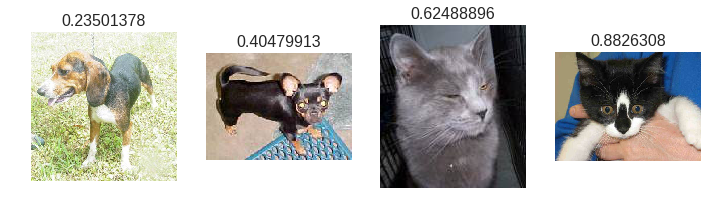

In [83]:
#1. A few correct labels at random
correct = np.where(preds==val_labels[:,1])[0]
idx = permutation(correct)[:n_view]
plots_idx(idx, probs[idx])

In [0]:
#2. A few incorrect labels at random

#incorrect = np.where(preds!=val_labels[:,1])[0]
#idx = permutation(incorrect)[:n_view]
#plots_idx(idx, probs[idx])

#hmmmm gotta see why the index is out of range...

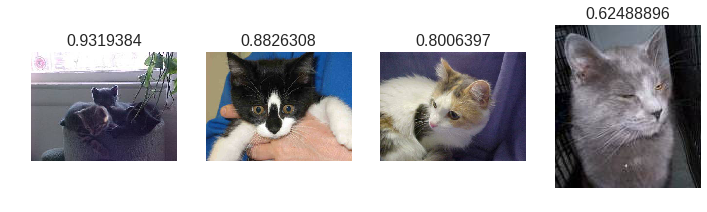

In [85]:
#3. The images we most confident were cats, and are actually cats
correct_cats = np.where((preds==0) & (preds==val_labels[:,1]))[0]
most_correct_cats = np.argsort(probs[correct_cats])[::-1][:n_view]
plots_idx(correct_cats[most_correct_cats], probs[correct_cats][most_correct_cats])

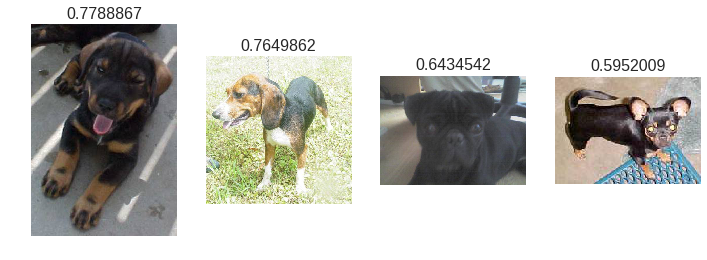

In [86]:
# as above, but dogs
correct_dogs = np.where((preds==1) & (preds==val_labels[:,1]))[0]
most_correct_dogs = np.argsort(probs[correct_dogs])[:n_view]
plots_idx(correct_dogs[most_correct_dogs], 1-probs[correct_dogs][most_correct_dogs])

In [87]:
#3. The images we were most confident were cats, but are actually dogs
incorrect_cats = np.where((preds==0) & (preds!=val_labels[:,1]))[0]
most_incorrect_cats = np.argsort(probs[incorrect_cats])[::-1][:n_view]
if len(most_incorrect_cats):
    plots_idx(incorrect_cats[most_incorrect_cats], probs[incorrect_cats][most_incorrect_cats])
else:
    print('No incorrect cats!')

No incorrect cats!


In [88]:
#3. The images we were most confident were dogs, but are actually cats
incorrect_dogs = np.where((preds==1) & (preds!=val_labels[:,1]))[0]
most_incorrect_dogs = np.argsort(probs[incorrect_dogs])[:n_view]
if len(most_incorrect_dogs):
    plots_idx(incorrect_dogs[most_incorrect_dogs], 1-probs[incorrect_dogs][most_incorrect_dogs])
else:
    print('No incorrect dogs!')

No incorrect dogs!


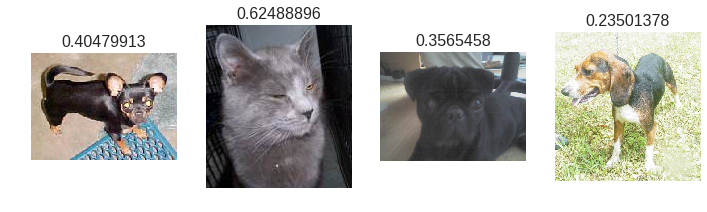

In [89]:
#5. The most uncertain labels (ie those with probability closest to 0.5).
most_uncertain = np.argsort(np.abs(probs-0.5))
plots_idx(most_uncertain[:n_view], probs[most_uncertain])

Perhaps the most common way to analyze the result of a classification model is to use a [confusion matrix](http://www.dataschool.io/simple-guide-to-confusion-matrix-terminology/). Scikit-learn has a convenient function we can use for this purpose:

In [0]:
cm = confusion_matrix(val_classes, preds)

We can just print out the confusion matrix, or we can show a graphical view (which is mainly useful for dependents with a larger number of categories).

[[4 0]
 [0 4]]


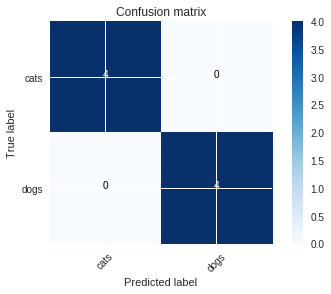

In [91]:
plot_confusion_matrix(cm, val_batches.class_indices)

### About activation functions

Difference in definition of linear modelvs the stack in the vgg16

```python
lm = Sequential([ Dense(2, activation='softmax', input_shape=(1000,)) ])
```

And do you remember the definition of a fully connected layer in the original VGG?:

```python
model.add(Dense(4096, activation='relu'))
```

An 'activation' parameter in Keras causes an additional function to be called after the layer is calculated.
there was no such parameter in our most basic linear model at the start of this lesson   
because a simple linear model has no *activation function*.  
But nearly all deep model layers have an activation function - specifically,   
a *non-linear* activation function,   
such as tanh, sigmoid (```1/(1+exp(x))```),   
or relu (```max(0,x)```, called the *rectified linear* function).[relu... similar to the rectifier in electronics]

Stack purely linear layers on top of each other,   
then you just end up with a linear layer..for instance, if your first layer was ```2*x```, and your second was ```-2*x```, then the combination is: ```-2*(2*x) = -4*x```.   
not very deep aint it  

Addition of a relu activation after our first layer? Then the combination would be: ```-2 * max(0, 2*x)```.   
As you can see, that does not simplify to just a linear function like the previous example--  this helps create arbitrarily complex functions. refer to that link which describes an wavy funciton as an approximation of such suqre funcitons like the above..  

this is done like so.. because stack of linear functions and non-linear activations can approximate any other function just as close as we want.  
So we can **use it to model anything**[almost.. we are still pusing limits]!  
This extraordinary insight is known as the *universal approximation theorem*. For a visual understanding of how and why this works, I strongly recommend you read Michael Nielsen's [excellent interactive visual tutorial](http://neuralnetworksanddeeplearning.com/chap4.html).

The last layer generally needs a different activation function to the other layers--  
because we want to encourage the last layer's output to be of an appropriate form for our particular problem.  
For instance,  
if our output is a one hot encoded categorical variable,   
we want our final layer's activations to add to one (so they can be treated as probabilities)   
and to have generally a single activation much higher than the rest  
(since with one hot encoding we have just a single 'one', and all other target outputs are zero).  

most classication problems will always have this form, the activation function that has these properties: the *softmax* function.   
Softmax is defined as (for the i'th output activation): ```exp(x[i]) / sum(exp(x))```. Tadaaaaannnn


There are other activation functions later in this course - but relu (and minor variations) for intermediate layers and softmax for output layers will be by far the most common.

# Modifying the model

## Retrain last layer's linear model

Since the original VGG16 network's last layer is Dense (i.e. a linear model) it seems a little odd that we are adding an additional linear model on top of it. This is especially true since the last layer had a softmax activation, which is an odd choice for an intermediate layer--and by adding an extra layer on top of it, we have made it an intermediate layer.  

Goal: remove the original final layer and replaced it with one that we train for the purpose of distinguishing cats and dogs

  -1 start by removing the last layer, and   
  -2 that we want to fix the weights in all the other layers (since we aren't looking to learn new parameters for those other layers).

In [92]:
vgg.model.summary()

____________________________________________________________________________________________________
Layer (type)                     Output Shape          Param #     Connected to                     
lambda_4 (Lambda)                (None, 3, 224, 224)   0           lambda_input_4[0][0]             
____________________________________________________________________________________________________
zeropadding2d_40 (ZeroPadding2D) (None, 3, 226, 226)   0           lambda_4[0][0]                   
____________________________________________________________________________________________________
convolution2d_40 (Convolution2D) (None, 64, 224, 224)  1792        zeropadding2d_40[0][0]           
____________________________________________________________________________________________________
zeropadding2d_41 (ZeroPadding2D) (None, 64, 226, 226)  0           convolution2d_40[0][0]           
___________________________________________________________________________________________

In [0]:
model.pop() # strip out the outermost layer
for layer in model.layers: layer.trainable=False

**Careful!** modified the definition of *model*, be careful not to rerun any code in the previous sections, without first recreating the model from scratch!


Now we're ready to add our new final layer...

In [0]:
model.add(Dense(2, activation='softmax'))
# thsi is it..
# the act of stripping the previous models output and the op is now 2

In [0]:
## ??vgg.finetune
# Doubel qn mark for doc
# sincle ? for syntax...
# remember again dense is a linear model by default

...and compile our updated model, and set up our batches to use the preprocessed images   
(note that now we will also *shuffle* the training batches, to add more randomness when using multiple epochs):

In [0]:
gen=image.ImageDataGenerator()
batches = gen.flow(trn_data, trn_labels, batch_size=batch_size, shuffle=True)
val_batches = gen.flow(val_data, val_labels, batch_size=batch_size, shuffle=False)

We'll define a simple function for fitting models, just to save a little typing...

In [0]:
#def fit_model(model, batches, val_batches, nb_epoch=1):
 #   model.fit_generator(batches, samples_per_epoch=batches.n, nb_epoch=nb_epoch, 
  #                      validation_data=val_batches, nb_val_samples=val_batches.n)
  
  #Used the following definition for the fit model..
  

There was an issue with the above difinition of the fit model funciton..  


Source: http://forums.fast.ai/t/lesson-2-fit-model/1143/4
Unlike what has been described.. 
The fix was the reverse of what has been suggested in the forum above..

In [0]:
def fit_model(model, batches, val_batches, nb_epoch=1):
  model.fit_generator(batches, samples_per_epoch=batches.N, nb_epoch=nb_epoch, validation_data=val_batches, nb_val_samples=val_batches.N)

...and now we can use it [the above fit model funciton] to train the last layer of our model!

(It runs quite slowly, since it still has to calculate all the previous layers in order to know what input to pass to the new final layer. We could precalculate the output of the penultimate layer, like we did for the final layer earlier - but since we're only likely to want one or two iterations, it's easier to follow this alternative approach.)

In [0]:
opt = RMSprop(lr=0.1) # optimizer object
model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])

In [99]:
fit_model(model, batches, val_batches, nb_epoch=2)

Epoch 1/2
16/16 [==============================] - 1s - loss: 7.5276 - acc: 0.3750 - val_loss: 8.0590 - val_acc: 0.5000
Epoch 2/2
16/16 [==============================] - 0s - loss: 7.5895 - acc: 0.5000 - val_loss: 4.0295 - val_acc: 0.7500


very little code had to be writen in this section to finetune the model.  
Because this is such an important and common operation, keras is set up to make it as easy as possible.  
didn't even have to use any external helper functions in this section.

It's a good idea to save weights of all your models, so you can re-use them later. Be sure to note the git log number of your model when keeping a research journal of your results.

In [0]:
model.save_weights(model_path+'finetune1.h5')

In [0]:
model.load_weights(model_path+'finetune1.h5')

In [102]:
model.evaluate(val_data, val_labels)

8/8 [==============================] - 1s


[4.029535293579102, 0.75]

We can look at the earlier prediction examples visualizations by redefining *probs* and *preds* and re-using our earlier code.

In [103]:
preds = model.predict_classes(val_data, batch_size=batch_size)
probs = model.predict_proba(val_data, batch_size=batch_size)[:,0]
probs[:8]

8/8 [==============================] - 0s     


array([0.    , 0.9999, 0.    , 1.    , 0.    , 0.    , 0.    , 0.    ], dtype=float32)

In [0]:
cm = confusion_matrix(val_classes, preds)

[[2 2]
 [0 4]]


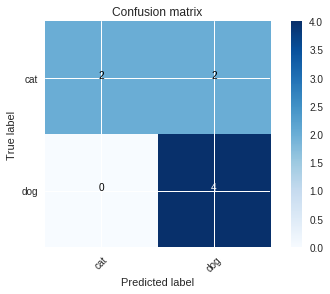

In [105]:
plot_confusion_matrix(cm, {'cat':0, 'dog':1})

## Retraining more layers

Now that we've fine-tuned the new final layer, can we, and should we, fine-tune *all* the dense layers?  
yes to both!   
start with the "can we" question...

### An introduction to back-propagation

The key to training multiple layers of a model, rather than just one, lies in a technique called "back-propagation" a.k.a *backprop* to its friends  
Backprop:: fuilty of:: creating a new word for something that already exists - in this case,  
backprop simply refers to calculating gradients using the *chain rule*. derivatives  

As you (hopefully!) remember from high school, the chain rule is how you calculate the gradient of a "function of a function"--something of the form *f(u), where u=g(x)*. For instance, let's say your function is ```pow((2*x), 2)```. Then u is ```2*x```, and f(u) is ```power(u, 2)```. The chain rule tells us that the derivative of this is simply the product of the derivatives of f() and g(). Using *f'(x)* to refer to the derivative, we can say that: ```f'(x) = f'(u) * g'(x) = 2*u * 2 = 2*(2*x) * 2 = 8*x```.

Let's check our calculation:

In [106]:
# sympy let's us do symbolic differentiation (and much more!) in python
import sympy as sp
# we have to define our variables
x = sp.var('x') # like x is the var that we are diff w.r.t.
# then we can request the derivative or any expression of that variable
pow(2*x,2).diff()

8*x

The key insight is that the stacking of linear functions and non-linear activations we learnt about in the last section is simply defining a function of functions (of functions, of functions...).  
refer to 3 blue 1 brown.. for how matrices.. represent such transformations  
Each layer is taking the output of the previous layer's function, and using it as input into its function.  
Therefore, we can calculate the derivative at any layer by simply multiplying the gradients of that layer and all of its following layers together!  
The above is where the chain rule is coming intot he picture.. use simething like the   
sumpy based differentiation for each of the layers and chen then together..?  

This use of the chain rule to allow us to rapidly calculate the derivatives of our model at any layer is referred to as *back propagation*.

Dnt have to worry about the details of this yourself, since libraries like Theano and Tensorflow (and therefore wrappers like Keras) provide *automatic differentiation* (or *AD*).     
*;**TODO*** Unable to find docs related to this tho.. gotta check.. 

### Training multiple layers in Keras

The code below will work on any model that contains dense layers; it's not just for this VGG model.

***V.I.P***  
NB: Don't skip the step of fine-tuning just the final layer first, since otherwise you'll have one layer with random weights,   
which will cause the other layers to quickly move a long way from their optimized imagenet weights.


In [0]:
layers = model.layers
# Get the index of the first dense layer...
first_dense_idx = [index for index,layer in enumerate(layers) if type(layer) is Dense][0]
# ...and set this and all subsequent layers to trainable
for layer in layers[first_dense_idx:]: layer.trainable=True

Since we haven't changed our architecture, there's no need to re-compile the model - instead, we just set the learning rate. Since we're training more layers, and since we've already optimized the last layer, we should use a lower learning rate than previously.

In [108]:
K.set_value(opt.lr, 0.01) # K is backend https://keras.io/backend/
fit_model(model, batches, val_batches, 3)

Epoch 1/3
16/16 [==============================] - 0s - loss: 7.0517 - acc: 0.5625 - val_loss: 4.0295 - val_acc: 0.7500
Epoch 2/3
16/16 [==============================] - 0s - loss: 7.0517 - acc: 0.5625 - val_loss: 4.0295 - val_acc: 0.7500
Epoch 3/3
16/16 [==============================] - 0s - loss: 7.0517 - acc: 0.5625 - val_loss: 4.0295 - val_acc: 0.7500


This is an extraordinarily powerful 5 lines of code. We have fine-tuned all of our dense layers to be optimized for our specific data set. This kind of technique has only become accessible in the last year or two - and we can already do it in just 5 lines of python!

In [0]:
model.save_weights(model_path+'finetune2.h5')

There's generally little room for improvement in training the convolutional layers, if you're using the model on natural images (as we are). However, there's no harm trying a few of the later conv layers, since it may give a slight improvement, and can't hurt (and we can always load the previous weights if the accuracy decreases).

In [0]:
for layer in layers[12:]: layer.trainable=True # set layers from 12 to..  as trainable
K.set_value(opt.lr, 0.001)

In [111]:
fit_model(model, batches, val_batches, 4)

Epoch 1/4
16/16 [==============================] - 0s - loss: 7.0517 - acc: 0.5625 - val_loss: 4.0295 - val_acc: 0.7500
Epoch 2/4
16/16 [==============================] - 0s - loss: 7.0517 - acc: 0.5625 - val_loss: 4.0295 - val_acc: 0.7500
Epoch 3/4
16/16 [==============================] - 0s - loss: 7.0517 - acc: 0.5625 - val_loss: 4.0295 - val_acc: 0.7500
Epoch 4/4
16/16 [==============================] - 0s - loss: 7.0517 - acc: 0.5625 - val_loss: 4.0295 - val_acc: 0.7500


In [0]:
model.save_weights(model_path+'finetune3.h5')

In [113]:
model_path

'data/dogscats/sample/models/'

You can always load the weights later and use the model to do whatever you need:

In [114]:
model.load_weights(model_path+'finetune2.h5')
model.evaluate_generator(get_batches(path+'valid', gen, False, batch_size*2), val_batches.N)

Found 8 images belonging to 2 classes.


[4.029535293579102, 0.75]

In [0]:
# appending lesson 3's cells.. since we are working ont he same data set...
# addition avoids the need to do the time consuming ooperations of data transfer and installation of the required libraries..

# Lesoon 3 is appended..

In [0]:
#Continue.. with the run.. using colab GPU.. and the same data set..

In [0]:
#from theano.sandbox import cuda
#NOT SURE WHY WE NEED THIS

In [0]:
%matplotlib inline
import utils;# reload(utils)
from utils import *
from __future__ import division, print_function

In [0]:
#path = "data/dogscats/sample/"
path = "data/dogscats/"
model_path = path + 'models/'
if not os.path.exists(model_path): os.mkdir(model_path)

batch_size=64

## Are we underfitting?

Our validation accuracy so far has generally been higher than our training accuracy. That leads to two obvious questions:

1. How is this possible?
2. Is this desirable?

The answer to (1) is that this is happening because of *dropout*.  
Dropout refers to a layer that randomly deletes (i.e. sets to zero) each activation in the previous layer with probability *p* (generally 0.5).   
This only happens during training, not when calculating the accuracy on the validation set, which is why the validation set can show higher accuracy than the training set.

The purpose of dropout is to avoid overfitting. By deleting parts of the neural network at random during training, it ensures that no one part of the network can overfit to one part of the training set.   
The creation of dropout was one of the key developments in deep learning, and has allowed us to create rich models without overfitting.  
However, it can also result in underfitting if overused, and this is something we should be careful of with our model.

The answer to (2) is: this is probably not desirable. It is likely that we can get better validation set results with less (or no) dropout,   
if we're seeing that validation accuracy is higher than training accuracy - a strong sign of underfitting.   
So let's try removing dropout entirely, and see what happens!

(We had dropout in this model already because the VGG authors found it necessary for the imagenet competition. But that doesn't mean it's necessary for dogs v cats, so we will do our own analysis of regularization approaches from scratch.)

## Removing dropout

Our high level approach here will be to start with our fine-tuned cats vs dogs model (with dropout), then fine-tune all the dense layers, after removing dropout from them. The steps we will take are:
- Re-create and load our modified VGG model with binary dependent (i.e. dogs v cats)
- Split the model between the convolutional (*conv*) layers and the dense layers
- Pre-calculate the output of the conv layers, so that we don't have to redundently re-calculate them on every epoch
- Create a new model with just the dense layers, and dropout p set to zero
- Train this new model using the output of the conv layers as training data.

As before we need to start with a working model, so let's bring in our working VGG 16 model and change it to predict our binary dependent...

In [0]:
model = vgg_ft(2) # fit dims 2

In [121]:
!ls data/dogscats/models

finetune3.h5


...and load our fine-tuned weights.

In [0]:
model.load_weights(model_path+'finetune3.h5')
# load what we saved above...
# not sure why.. but had to run the earlier cell that had model.save weights...
# reached from that step to this step too fast..? 

We're going to be training a number of iterations without dropout,  
so it would be best for us to pre-calculate the input to the fully connected layers - i.e. the *Flatten()* layer.  
We'll start by finding this layer in our model, and creating a new model that contains just the layers up to and including this layer:

In [0]:
layers = model.layers

In [0]:
last_conv_idx = [index for index,layer in enumerate(layers) 
                     if type(layer) is Convolution2D][-1] # really cool list enumeration

In [125]:
last_conv_idx

30

In [126]:
layers[last_conv_idx]

In [0]:
conv_layers = layers[:last_conv_idx+1] # conv layers is a list of layers [:n]
conv_model = Sequential(conv_layers)
# Dense layers - also known as fully connected or 'FC' layers
fc_layers = layers[last_conv_idx+1:] # fc_layers layers is a list of layers [n:]

 use the exact same approach to creating features as we used when we created the linear model from the imagenet predictions in the last lesson 

In [128]:
batches = get_batches(path+'train', shuffle=False, batch_size=batch_size)
val_batches = get_batches(path+'valid', shuffle=False, batch_size=batch_size)

val_classes = val_batches.classes
trn_classes = batches.classes
val_labels = onehot(val_classes)
trn_labels = onehot(trn_classes)

Found 23000 images belonging to 2 classes.
Found 2000 images belonging to 2 classes.


In [129]:
batches.class_indices

{'cats': 0, 'dogs': 1}

In [0]:
val_features = conv_model.predict_generator(val_batches, val_batches.nb_sample)

In [0]:
trn_features = conv_model.predict_generator(batches, batches.nb_sample)

In [0]:
save_array(model_path + 'train_convlayer_features.bc', trn_features)
save_array(model_path + 'valid_convlayer_features.bc', val_features)

In [0]:
trn_features = load_array(model_path+'train_convlayer_features.bc')
val_features = load_array(model_path+'valid_convlayer_features.bc')

In [0]:
trn_features.shape

(23000, 512, 14, 14)

For our new fully connected model, we'll create it using the exact same architecture as the last layers of VGG 16, so that we can conveniently copy pre-trained weights over from that model. However, we'll set the dropout layer's p values to zero, so as to effectively remove dropout.

In [0]:
# Copy the weights from the pre-trained model.
# NB: Since we're removing dropout, we want to half the weights
def proc_wgts(layer): return [o/2 for o in layer.get_weights()] # deep knowledge of the weights structure would have been req'ed if this was to be figured out by oneself.

In [0]:
# Such a finely tuned model needs to be updated very slowly!
opt = RMSprop(lr=0.00001, rho=0.7)

In [0]:
def get_fc_model():
    model = Sequential([
        MaxPooling2D(input_shape=conv_layers[-1].output_shape[1:]),
        Flatten(),
        Dense(4096, activation='relu'),
        Dropout(0.),
        Dense(4096, activation='relu'),
        Dropout(0.),
        Dense(2, activation='softmax')
        ])

    for l1,l2 in zip(model.layers, fc_layers): l1.set_weights(proc_wgts(l2))

    model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])
    return model

In [0]:
fc_model = get_fc_model()

And fit the model in the usual way:

In [0]:
fc_model.fit(trn_features, trn_labels, nb_epoch=8, 
             batch_size=batch_size, validation_data=(val_features, val_labels))

Train on 23000 samples, validate on 2000 samples
Epoch 1/8
23000/23000 [==============================] - 17s - loss: 0.2577 - acc: 0.9817 - val_loss: 0.3478 - val_acc: 0.9765
Epoch 2/8
23000/23000 [==============================] - 17s - loss: 0.2052 - acc: 0.9853 - val_loss: 0.2789 - val_acc: 0.9785
Epoch 3/8
23000/23000 [==============================] - 17s - loss: 0.1553 - acc: 0.9895 - val_loss: 0.2358 - val_acc: 0.9845
Epoch 4/8
23000/23000 [==============================] - 17s - loss: 0.1388 - acc: 0.9909 - val_loss: 0.1914 - val_acc: 0.9865
Epoch 5/8
23000/23000 [==============================] - 17s - loss: 0.1335 - acc: 0.9912 - val_loss: 0.2181 - val_acc: 0.9855
Epoch 6/8
23000/23000 [==============================] - 17s - loss: 0.1126 - acc: 0.9924 - val_loss: 0.1850 - val_acc: 0.9875
Epoch 7/8
23000/23000 [==============================] - 17s - loss: 0.1080 - acc: 0.9928 - val_loss: 0.2226 - val_acc: 0.9840
Epoch 8/8
23000/23000 [==============================] - 17s -

In [0]:
fc_model.save_weights(model_path+'no_dropout.h5')

In [0]:
fc_model.load_weights(model_path+'no_dropout.h5')

# Reducing overfitting

Now that we've gotten the model to overfit, we can take a number of steps to reduce this.
Overfit.. is when you have a training accuracy that s higher than the validation accuracy..  
underfitting hapenned in the prev model... because of the drop out layers...  
despite underfitting it helped the vgg model score well in the classififcaiton tasks.,


## Approaches to reducing overfitting

We do not necessarily need to rely on dropout or other regularization approaches to reduce overfitting.  
There are other techniques we should try first, since regularlization, by definition, biases our model towards simplicity -   
which we only want to do if we know that's necessary. This is the order that we recommend using for reducing overfitting (more details about each in a moment):

1. Add more data
2. Use data augmentation
3. Use architectures that generalize well
4. Add regularization
5. Reduce architecture complexity.

We'll assume that you've already collected as much data as you can, so step (1) isn't relevant (this is true for most Kaggle competitions, for instance).  
So the next step (2) is data augmentation.  
This refers to creating additional synthetic data, based on reasonable modifications of your input data. For images, this is likely to involve one or more of: flipping, rotation, zooming, cropping, panning, minor color changes.[all within keras]

Which types of augmentation are appropriate depends on your data.   
For regular photos, for instance, you'll want to use horizontal flipping, but not vertical flipping (since an upside down car is much less common than a car the right way up)

We recommend *always* using at least some light data augmentation,  
unless you have so much data that your model will never see the same input twice.

## About data augmentation

Keras comes with very convenient features for automating data augmentation. You simply define what types and maximum amounts of augmentation you want, and keras ensures that every item of every batch randomly is changed according to these settings.   
Here's how to define a generator that includes data augmentation:

In [0]:
# dim_ordering='tf' uses tensorflow dimension ordering,
#   which is the same order as matplotlib uses for display.
# Therefore when just using for display purposes, this is more convenient
# at later stage.. return to theano ordering..
gen = image.ImageDataGenerator(rotation_range=10, width_shift_range=0.1, 
       height_shift_range=0.1, shear_range=0.15, zoom_range=0.1, 
       channel_shift_range=10., horizontal_flip=True, dim_ordering='tf')

Let's take a look at how this generator changes a single image (the details of this code don't matter much, but feel free to read the comments and keras docs to understand the details if you're interested).

In [0]:
# Create a 'batch' of a single image
img = np.expand_dims(ndimage.imread('data/dogscats/test/7.jpg'),0)
# Request the generator to create batches from this image
aug_iter = gen.flow(img)

In [0]:
# Get eight examples of these augmented images
aug_imgs = [next(aug_iter)[0].astype(np.uint8) for i in range(8)]

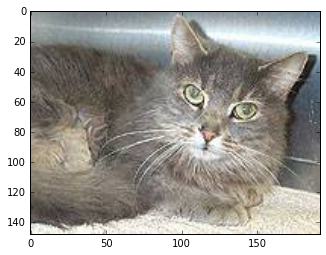

In [0]:
# The original
plt.imshow(img[0])

As you can see below, there's no magic to data augmentation - it's a very intuitive approach to generating richer input data. Generally speaking, your intuition should be a good guide to appropriate data augmentation, although it's a good idea to test your intuition by checking the results of different augmentation approaches.

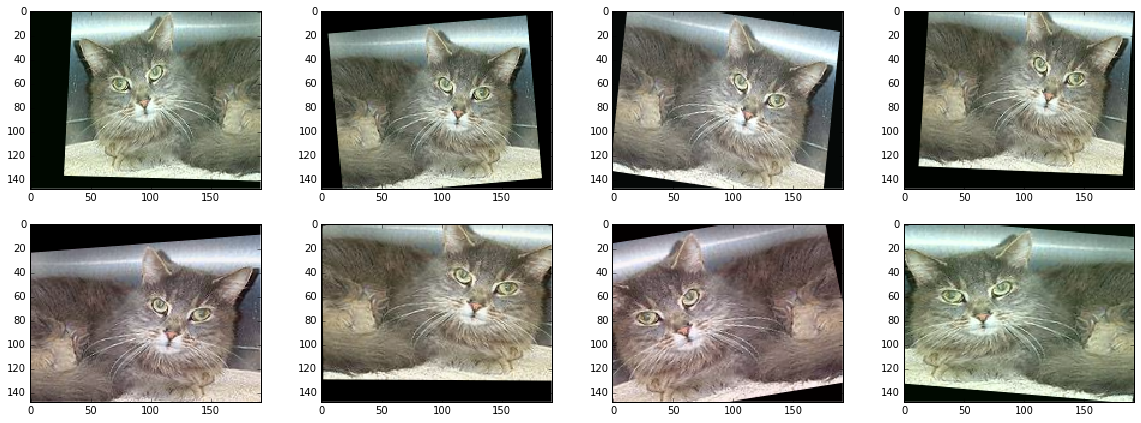

In [0]:
# Augmented data
plots(aug_imgs, (20,7), 2)

In [0]:
# Ensure that we return to theano dimension ordering
K.set_image_dim_ordering('th')

## Adding data augmentation

Let's try adding a small amount of data augmentation, and see if we reduce overfitting as a result. The approach will be identical to the method we used to finetune the dense layers in lesson 2, except that we will use a generator with augmentation configured. Here's how we set up the generator, and create batches from it:

In [0]:
gen = image.ImageDataGenerator(rotation_range=15, width_shift_range=0.1, 
                               height_shift_range=0.1, zoom_range=0.1, horizontal_flip=True)

In [0]:
batches = get_batches(path+'train', gen, batch_size=batch_size)
# NB: We don't want to augment or shuffle the validation set
val_batches = get_batches(path+'valid', shuffle=False, batch_size=batch_size)

Found 23000 images belonging to 2 classes.
Found 2000 images belonging to 2 classes.


When using data augmentation, we **can't** pre-compute our convolutional layer features, since randomized changes are being made to every input image.   
That is, even if the training process sees the same image multiple times, each time it will have undergone different data augmentation, so the results of the convolutional layers will be different.

Therefore, in order to allow data to flow through all the conv layers and our new dense layers, we attach our fully connected model to the convolutional model--after ensuring that the convolutional layers are **not** trainable:

In [0]:
fc_model = get_fc_model()

In [0]:
for layer in conv_model.layers: layer.trainable = False
# Look how easy it is to connect two models together!
# convolutional still has the weights that were loaded.. at half prob.. randomised .. the deep layers/ fully connected ones are being trained
conv_model.add(fc_model)

Now we can compile, train, and save our model as usual - note that we use *fit_generator()* since we want to pull random images from the directories on every batch.

In [0]:
conv_model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])

In [0]:
conv_model.fit_generator(batches, samples_per_epoch=batches.nb_sample, nb_epoch=8, 
                        validation_data=val_batches, nb_val_samples=val_batches.nb_sample)

Epoch 1/8
23000/23000 [==============================] - 273s - loss: 0.3374 - acc: 0.9761 - val_loss: 0.2294 - val_acc: 0.9835
Epoch 2/8
23000/23000 [==============================] - 273s - loss: 0.2879 - acc: 0.9800 - val_loss: 0.2837 - val_acc: 0.9815
Epoch 3/8
23000/23000 [==============================] - 273s - loss: 0.2650 - acc: 0.9817 - val_loss: 0.2569 - val_acc: 0.9830
Epoch 4/8
23000/23000 [==============================] - 273s - loss: 0.2449 - acc: 0.9833 - val_loss: 0.3230 - val_acc: 0.9785
Epoch 5/8
23000/23000 [==============================] - 273s - loss: 0.2248 - acc: 0.9847 - val_loss: 0.2759 - val_acc: 0.9825
Epoch 6/8
23000/23000 [==============================] - 273s - loss: 0.2098 - acc: 0.9857 - val_loss: 0.2304 - val_acc: 0.9850
Epoch 7/8
23000/23000 [==============================] - 273s - loss: 0.2131 - acc: 0.9855 - val_loss: 0.2385 - val_acc: 0.9840
Epoch 8/8
23000/23000 [==============================] - 273s - loss: 0.2017 - acc: 0.9859 - val_loss: 0

In [0]:
conv_model.fit_generator(batches, samples_per_epoch=batches.nb_sample, nb_epoch=3, 
                        validation_data=val_batches, nb_val_samples=val_batches.nb_sample)

Epoch 1/3
23000/23000 [==============================] - 273s - loss: 0.2023 - acc: 0.9859 - val_loss: 0.2563 - val_acc: 0.9840
Epoch 2/3
23000/23000 [==============================] - 273s - loss: 0.1851 - acc: 0.9870 - val_loss: 0.2777 - val_acc: 0.9820
Epoch 3/3
23000/23000 [==============================] - 273s - loss: 0.1737 - acc: 0.9878 - val_loss: 0.2252 - val_acc: 0.9845


In [0]:
conv_model.save_weights(model_path + 'aug1.h5')

In [0]:
conv_model.load_weights(model_path + 'aug1.h5')

## Batch normalization

### About batch normalization

Batch normalization (*batchnorm*) is a way to ensure that activations don't become too high or too low at any point in the model.  
Adjusting activations so they are of similar scales is called *normalization*.  

Normalization is very helpful for fast training - if some activations are very high, they will saturate the model and create very large gradients, causing training to fail;  
if very low, they will cause training to proceed very slowly. Furthermore, large or small activations in one layer will tend to result in even larger or smaller activations in later layers, since the activations get multiplied repeatedly across the layers.

Prior to the development of batchnorm in 2015, only the inputs to a model could be effectively normalized - by simply subtracting their mean and dividing by their standard deviation.  
However, weights in intermediate layers could easily become poorly scaled, due to problems in weight initialization, or a high learning rate combined with random fluctuations in weights.

Batchnorm resolves this problem by normalizing each intermediate layer as well. 
The important takeaway is that **all modern networks should use batchnorm, or something equivalent**. There are two reasons for this:
1. Adding batchnorm to a model can result in **10x or more improvements in training speed**
2. Because normalization greatly reduces the ability of a small number of outlying inputs to over-influence the training, it also tends to **reduce overfitting**.

As promised, here's a brief outline of how batchnorm works. As a first step, it normalizes intermediate layers in the same way as input layers can be normalized. But this on its own would not be enough, since the model would then just push the weights up or down indefinitely to try to undo this normalization. Therefore, batchnorm takes two additional steps:
1. Add two more trainable parameters to each layer - one to multiply all activations to set an arbitrary standard deviation, and one to add to all activations to set an arbitary mean
2. Incorporate both the normalization, and the learnt multiply/add parameters, into the gradient calculations during backprop.

This ensures that the weights don't tend to push very high or very low (since the normalization is included in the gradient calculations, so the updates are aware of the normalization). But it also ensures that if a layer does need to change the overall mean or standard deviation in order to match the output scale, it can do so.

### Adding batchnorm to the model

We can use nearly the same approach as before - but this time we'll add batchnorm layers (and dropout layers):

In [0]:
conv_layers[-1].output_shape[1:] # last of the conv layers

(512, 14, 14)

In [0]:
def get_bn_layers(p):
    return [
        MaxPooling2D(input_shape=conv_layers[-1].output_shape[1:]),
        Flatten(),
        Dense(4096, activation='relu'),
        BatchNormalization(),
        Dropout(p),
        Dense(4096, activation='relu'),
        BatchNormalization(),# insertion of the batch normalization layer
        Dropout(p),
        Dense(1000, activation='softmax')
        ]

In [0]:
def load_fc_weights_from_vgg16bn(model):
    "Load weights for model from the dense layers of the Vgg16BN model."
    # See imagenet_batchnorm.ipynb for info on how the weights for
    # Vgg16BN can be generated from the standard Vgg16 weights.
    from vgg16bn import Vgg16BN
    vgg16_bn = Vgg16BN()
    _, fc_layers = split_at(vgg16_bn.model, Convolution2D)
    copy_weights(fc_layers, model.layers)

In [0]:
p=0.6

In [0]:
bn_model = Sequential(get_bn_layers(0.6)) # is the prob parameter.. for the drop out layer

In [0]:
load_fc_weights_from_vgg16bn(bn_model)

In [0]:
def proc_wgts(layer, prev_p, new_p):
    scal = (1-prev_p)/(1-new_p)
    return [o*scal for o in layer.get_weights()]

In [0]:
for l in bn_model.layers: 
    if type(l)==Dense: l.set_weights(proc_wgts(l, 0.5, 0.6))

In [0]:
bn_model.pop()
for layer in bn_model.layers: layer.trainable=False

In [0]:
bn_model.add(Dense(2,activation='softmax')) # binary output

In [0]:
bn_model.compile(Adam(), 'categorical_crossentropy', metrics=['accuracy']) # compile

In [0]:
bn_model.fit(trn_features, trn_labels, nb_epoch=8, validation_data=(val_features, val_labels)) # train to get the output trained at two outputs

Train on 23000 samples, validate on 2000 samples
Epoch 1/8
23000/23000 [==============================] - 6s - loss: 0.1800 - acc: 0.9547 - val_loss: 0.1132 - val_acc: 0.9760
Epoch 2/8
23000/23000 [==============================] - 6s - loss: 0.1001 - acc: 0.9650 - val_loss: 0.1019 - val_acc: 0.9795
Epoch 3/8
23000/23000 [==============================] - 6s - loss: 0.0911 - acc: 0.9664 - val_loss: 0.1171 - val_acc: 0.9780
Epoch 4/8
23000/23000 [==============================] - 6s - loss: 0.0894 - acc: 0.9674 - val_loss: 0.1072 - val_acc: 0.9790
Epoch 5/8
23000/23000 [==============================] - 6s - loss: 0.0904 - acc: 0.9658 - val_loss: 0.0891 - val_acc: 0.9800
Epoch 6/8
23000/23000 [==============================] - 6s - loss: 0.0834 - acc: 0.9680 - val_loss: 0.0990 - val_acc: 0.9805
Epoch 7/8
23000/23000 [==============================] - 6s - loss: 0.0831 - acc: 0.9686 - val_loss: 0.0989 - val_acc: 0.9805
Epoch 8/8
23000/23000 [==============================] - 6s - loss: 0

In [0]:
bn_model.save_weights(model_path+'bn.h5')

In [0]:
bn_model.load_weights(model_path+'bn.h5')

In [0]:
bn_layers = get_bn_layers(0.6) # batchnormalised layers..? model..?
bn_layers.pop()
bn_layers.append(Dense(2,activation='softmax')) # seems sames as Bn model iwthout the FC layer weighs of the VGG 16 BN model

In [0]:
final_model = Sequential(conv_layers)
for layer in final_model.layers: layer.trainable = False
for layer in bn_layers: final_model.add(layer)

In [0]:
for l1,l2 in zip(bn_model.layers, bn_layers): # stitch the 2 models.. chk zip
    l2.set_weights(l1.get_weights())

In [0]:
final_model.compile(optimizer=Adam(), 
                    loss='categorical_crossentropy', metrics=['accuracy'])

In [0]:
final_model.fit_generator(batches, samples_per_epoch=batches.nb_sample, nb_epoch=1, 
                        validation_data=val_batches, nb_val_samples=val_batches.nb_sample)

Epoch 1/1
23000/23000 [==============================] - 282s - loss: 0.0855 - acc: 0.9677 - val_loss: 0.0609 - val_acc: 0.9830


In [0]:
final_model.save_weights(model_path + 'final1.h5') # validation accuracy.. higher than the BN model plain.. 
# and the training accuracy is lower than the val accuracy

In [0]:
final_model.fit_generator(batches, samples_per_epoch=batches.nb_sample, nb_epoch=4, 
                        validation_data=val_batches, nb_val_samples=val_batches.nb_sample)

Epoch 1/4
23000/23000 [==============================] - 282s - loss: 0.0734 - acc: 0.9723 - val_loss: 0.0743 - val_acc: 0.9810
Epoch 2/4
23000/23000 [==============================] - 282s - loss: 0.0661 - acc: 0.9760 - val_loss: 0.0490 - val_acc: 0.9840
Epoch 3/4
23000/23000 [==============================] - 282s - loss: 0.0641 - acc: 0.9762 - val_loss: 0.0633 - val_acc: 0.9800
Epoch 4/4
23000/23000 [==============================] - 282s - loss: 0.0579 - acc: 0.9776 - val_loss: 0.0553 - val_acc: 0.9840


In [0]:
final_model.save_weights(model_path + 'final2.h5')

In [0]:
final_model.optimizer.lr=0.001

In [0]:
final_model.fit_generator(batches, samples_per_epoch=batches.nb_sample, nb_epoch=4, 
                        validation_data=val_batches, nb_val_samples=val_batches.nb_sample)

Epoch 1/4
23000/23000 [==============================] - 282s - loss: 0.0509 - acc: 0.9810 - val_loss: 0.0748 - val_acc: 0.9835
Epoch 2/4
23000/23000 [==============================] - 282s - loss: 0.0480 - acc: 0.9833 - val_loss: 0.0755 - val_acc: 0.9830
Epoch 3/4
23000/23000 [==============================] - 282s - loss: 0.0538 - acc: 0.9807 - val_loss: 0.0596 - val_acc: 0.9850
Epoch 4/4
23000/23000 [==============================] - 282s - loss: 0.0453 - acc: 0.9834 - val_loss: 0.0616 - val_acc: 0.9860


In [0]:
bn_model.save_weights(model_path + 'final3.h5')